In [2]:
# imports 
import math
import os
import json
import matplotlib.pyplot as plt

In [3]:
def matrixToEuler(matrix):
    if not matrix:
        return []
    sy = math.sqrt(matrix[0][0] * matrix[0][0] + matrix[1][0] * matrix[1][0])
    singular = sy < 1e-6
    if not singular:
        x = math.atan2(matrix[2][1], matrix[2][2])
        y = math.atan2(-matrix[2][0], sy)
        z = math.atan2(matrix[1][0], matrix[0][0])
    else:
        x = math.atan2(-matrix[1][2], matrix[1][1])
        y = math.atan2(-matrix[2][0], sy)
        z = 0
    return x, y, z


class PoeData:
    def __init__(self, boardName):
        self.name = boardName

        # sort all camera data into designated dictionaries
        self.camera0 = dict()
        self.camera1 = dict()
        self.camera2 = dict()

        # camera 0 specifications
        self.camera0["distortionCoeff"] = []
        self.camera0["rotationMatrix"] = dict()
        self.camera0["rotationMatrix"]["x"] = []
        self.camera0["rotationMatrix"]["y"] = []
        self.camera0["rotationMatrix"]["z"] = []
        self.camera0["specTranslation"] = dict()
        self.camera0["specTranslation"]["x"] = []
        self.camera0["specTranslation"]["y"] = []
        self.camera0["specTranslation"]["z"] = []
        self.camera0["translation"] = dict()
        self.camera0["translation"]["x"] = []
        self.camera0["translation"]["y"] = []
        self.camera0["translation"]["z"] = []
        self.camera0["height"] = []
        self.camera0["intrinsicMatrix"] = dict()
        self.camera0["intrinsicMatrix"]["x"] = []
        self.camera0["intrinsicMatrix"]["y"] = []
        self.camera0["intrinsicMatrix"]["z"] = []
        self.camera0["specHfovDeg"] = []
        self.camera0["width"] = []

        # camera 1 specifications
        self.camera1["distortionCoeff"] = []
        self.camera1["rotationMatrix"] = dict()
        self.camera1["rotationMatrix"]["x"] = []
        self.camera1["rotationMatrix"]["y"] = []
        self.camera1["rotationMatrix"]["z"] = []
        self.camera1["specTranslation"] = dict()
        self.camera1["specTranslation"]["x"] = []
        self.camera1["specTranslation"]["y"] = []
        self.camera1["specTranslation"]["z"] = []
        self.camera1["translation"] = dict()
        self.camera1["translation"]["x"] = []
        self.camera1["translation"]["y"] = []
        self.camera1["translation"]["z"] = []
        self.camera1["height"] = []
        self.camera1["intrinsicMatrix"] = dict()
        self.camera1["intrinsicMatrix"]["x"] = []
        self.camera1["intrinsicMatrix"]["y"] = []
        self.camera1["intrinsicMatrix"]["z"] = []
        self.camera1["specHfovDeg"] = []
        self.camera1["width"] = []

        # camera 2 specifications
        self.camera2["distortionCoeff"] = []
        self.camera2["rotationMatrix"] = dict()
        self.camera2["rotationMatrix"]["x"] = []
        self.camera2["rotationMatrix"]["y"] = []
        self.camera2["rotationMatrix"]["z"] = []
        self.camera2["specTranslation"] = dict()
        self.camera2["specTranslation"]["x"] = []
        self.camera2["specTranslation"]["y"] = []
        self.camera2["specTranslation"]["z"] = []
        self.camera2["translation"] = dict()
        self.camera2["translation"]["x"] = []
        self.camera2["translation"]["y"] = []
        self.camera2["translation"]["z"] = []
        self.camera2["height"] = []
        self.camera2["intrinsicMatrix"] = dict()
        self.camera2["intrinsicMatrix"]["x"] = []
        self.camera2["intrinsicMatrix"]["y"] = []
        self.camera2["intrinsicMatrix"]["z"] = []
        self.camera2["specHfovDeg"] = []
        self.camera2["width"] = []

        # imu data
        self.imuRotationMatrix = dict()
        self.imuRotationMatrix["x"] = []
        self.imuRotationMatrix["y"] = []
        self.imuRotationMatrix["z"] = []
        self.imuSpecTranslation = dict()
        self.imuSpecTranslation["x"] = []
        self.imuSpecTranslation["y"] = []
        self.imuSpecTranslation["z"] = []
        self.imuTranslation = dict()
        self.imuTranslation["x"] = []
        self.imuTranslation["y"] = []
        self.imuTranslation["z"] = []

        # rectified data
        self.rectifiedRotationLeft = dict()
        self.rectifiedRotationLeft["x"] = []
        self.rectifiedRotationLeft["y"] = []
        self.rectifiedRotationLeft["z"] = []
        self.rectifiedRotationRight = dict()
        self.rectifiedRotationRight["x"] = []
        self.rectifiedRotationRight["y"] = []
        self.rectifiedRotationRight["z"] = []

        # miscellaneous data
        self.miscellaneousData = []

    def inputData(self, cameraData, imuData, miscellaneousData, rectificationData):
        # because data in json files is not always in same order, we sort data before storing it
        if cameraData[0][0] == 0:
            # camera 0
            self.camera0Save(cameraData[0][1])

        elif cameraData[0][0] == 1:
            # camera 1
            self.camera1Save(cameraData[0][1])

        else:
            # camera 2
            self.camera2Save(cameraData[0][1])
        if len(cameraData) > 1:
            if cameraData[1][0] == 0:
                # camera 0
                self.camera0Save(cameraData[1][1])

            elif cameraData[1][0] == 1:
                # camera 1
                self.camera1Save(cameraData[1][1])

            else:
                # camera 2
                self.camera2Save(cameraData[1][1])

            if cameraData[2][0] == 0:
                # camera 0
                self.camera1Save(cameraData[2][1])

            elif cameraData[2][0] == 1:
                # camera 1
                self.camera1Save(cameraData[2][1])

            else:
                # camera 2
                self.camera2Save(cameraData[2][1])

        # imu data
        if imuData["rotationMatrix"]:
            tmp = matrixToEuler(imuData["rotationMatrix"])
            self.imuRotationMatrix["x"].append(tmp[0])
            self.imuRotationMatrix["y"].append(tmp[1])
            self.imuRotationMatrix["z"].append(tmp[2])
        self.imuSpecTranslation["x"].append(imuData["specTranslation"]["x"])
        self.imuSpecTranslation["y"].append(imuData["specTranslation"]["y"])
        self.imuSpecTranslation["z"].append(imuData["specTranslation"]["z"])
        self.imuTranslation["x"].append(imuData["translation"]["x"])
        self.imuTranslation["y"].append(imuData["translation"]["y"])
        self.imuTranslation["z"].append(imuData["translation"]["z"])

        # miscellaneous data
        if miscellaneousData:
            self.miscellaneousData.append(miscellaneousData)

        # rectification data
        if rectificationData["rectifiedRotationLeft"]:
            tmp = matrixToEuler(rectificationData["rectifiedRotationLeft"])
            self.rectifiedRotationLeft["x"].append(tmp[0])
            self.rectifiedRotationLeft["y"].append(tmp[1])
            self.rectifiedRotationLeft["z"].append(tmp[2])
        if rectificationData["rectifiedRotationRight"]:
            tmp = matrixToEuler(rectificationData["rectifiedRotationRight"])
            self.rectifiedRotationRight["x"].append(tmp[0])
            self.rectifiedRotationRight["y"].append(tmp[1])
            self.rectifiedRotationRight["z"].append(tmp[2])

    def camera0Save(self, data):
        self.camera0["distortionCoeff"].append(data["distortionCoeff"])

        # camera 0 does not have rotation matrix?
        # tmp = matrixToEuler(data["extrinsics"]["rotationMatrix"])
        # self.camera0["rotationMatrix"]["x"].append(tmp[0])
        # self.camera0["rotationMatrix"]["y"].append(tmp[1])
        # self.camera0["rotationMatrix"]["z"].append(tmp[2])

        # save each spec translation component
        self.camera0["specTranslation"]["x"].append(data["extrinsics"]["specTranslation"]["x"])
        self.camera0["specTranslation"]["y"].append(data["extrinsics"]["specTranslation"]["y"])
        self.camera0["specTranslation"]["z"].append(data["extrinsics"]["specTranslation"]["z"])

        # save each translation component
        self.camera0["translation"]["x"].append(data["extrinsics"]["translation"]["x"])
        self.camera0["translation"]["y"].append(data["extrinsics"]["translation"]["y"])
        self.camera0["translation"]["z"].append(data["extrinsics"]["translation"]["z"])
        self.camera0["height"].append(data["height"])

        # save each intrinsic matrix component
        tmp = matrixToEuler(data["intrinsicMatrix"])
        self.camera0["intrinsicMatrix"]["x"].append(tmp[0])
        self.camera0["intrinsicMatrix"]["y"].append(tmp[1])
        self.camera0["intrinsicMatrix"]["z"].append(tmp[2])
        self.camera0["specHfovDeg"].append(data["specHfovDeg"])
        self.camera0["width"].append(data["width"])

    def camera1Save(self, data):
        self.camera1["distortionCoeff"].append(data["distortionCoeff"])

        # save each rotation matrix component
        tmp = matrixToEuler(data["extrinsics"]["rotationMatrix"])
        self.camera1["rotationMatrix"]["x"].append(tmp[0])
        self.camera1["rotationMatrix"]["y"].append(tmp[1])
        self.camera1["rotationMatrix"]["z"].append(tmp[2])

        # save each spec translation component
        self.camera1["specTranslation"]["x"].append(data["extrinsics"]["specTranslation"]["x"])
        self.camera1["specTranslation"]["y"].append(data["extrinsics"]["specTranslation"]["y"])
        self.camera1["specTranslation"]["z"].append(data["extrinsics"]["specTranslation"]["z"])

        # save each translation component
        self.camera1["translation"]["x"].append(data["extrinsics"]["translation"]["x"])
        self.camera1["translation"]["y"].append(data["extrinsics"]["translation"]["y"])
        self.camera1["translation"]["z"].append(data["extrinsics"]["translation"]["z"])
        self.camera1["height"].append(data["height"])

        # save each intrinsic matrix component
        tmp = matrixToEuler(data["intrinsicMatrix"])
        self.camera1["intrinsicMatrix"]["x"].append(tmp[0])
        self.camera1["intrinsicMatrix"]["y"].append(tmp[1])
        self.camera1["intrinsicMatrix"]["z"].append(tmp[2])
        self.camera1["specHfovDeg"].append(data["specHfovDeg"])
        self.camera1["width"].append(data["width"])

    def camera2Save(self, data):
        self.camera2["distortionCoeff"].append(data["distortionCoeff"])

        # save each rotation matrix component
        tmp = matrixToEuler(data["extrinsics"]["rotationMatrix"])
        self.camera2["rotationMatrix"]["x"].append(tmp[0])
        self.camera2["rotationMatrix"]["y"].append(tmp[1])
        self.camera2["rotationMatrix"]["z"].append(tmp[2])

        # save each spec translation component
        self.camera2["specTranslation"]["x"].append(data["extrinsics"]["specTranslation"]["x"])
        self.camera2["specTranslation"]["y"].append(data["extrinsics"]["specTranslation"]["y"])
        self.camera2["specTranslation"]["z"].append(data["extrinsics"]["specTranslation"]["z"])

        # save each translation component
        self.camera2["translation"]["x"].append(data["extrinsics"]["translation"]["x"])
        self.camera2["translation"]["y"].append(data["extrinsics"]["translation"]["y"])
        self.camera2["translation"]["z"].append(data["extrinsics"]["translation"]["z"])
        self.camera2["height"].append(data["height"])

        # save each intrinsic matrix component
        tmp = matrixToEuler(data["intrinsicMatrix"])
        self.camera2["intrinsicMatrix"]["x"].append(tmp[0])
        self.camera2["intrinsicMatrix"]["y"].append(tmp[1])
        self.camera2["intrinsicMatrix"]["z"].append(tmp[2])
        self.camera2["specHfovDeg"].append(data["specHfovDeg"])
        self.camera2["width"].append(data["width"])

    def plotHistogram(self, plotName):
        # camera 0 data is shown separately
        if plotName == "camera0-Rotation":
            plt.hist(
                [self.camera0["rotationMatrix"]["x"],
                 self.camera0["rotationMatrix"]["y"],
                 self.camera0["rotationMatrix"]["z"]]
                )
            plt.show()
        if plotName == "camera0-SpecTranslation":
            plt.hist(
                [self.camera0["specTranslation"]["x"],
                 self.camera0["specTranslation"]["y"],
                 self.camera0["specTranslation"]["z"]]
            )
            plt.show()
        if plotName == "camera0-Translation":
            plt.hist(
                [self.camera0["translation"]["x"],
                 self.camera0["translation"]["y"],
                 self.camera0["translation"]["z"]]
            )
            plt.show()
        if plotName == "camera0-WidthHeight":
            plt.hist(
                [self.camera0["width"],
                 self.camera0["height"]]
            )
            plt.show()
        if plotName == "camera0-IntrinsicMatrix":
            plt.hist(
                [self.camera0["intrinsicMatrix"]["x"],
                 self.camera0["intrinsicMatrix"]["y"],
                 self.camera0["intrinsicMatrix"]["z"]]
            )
            plt.show()
        if plotName == "camera0-SpecHfovDeg":
            plt.hist(
                self.camera0["specHfovDeg"]
            )
            plt.show()

        # camera 1 and camera 2 data will be shown together
        if plotName == "camera12-Rotation":
            plt.hist(
                [self.camera1["rotationMatrix"]["x"],
                 self.camera2["rotationMatrix"]["x"],
                 self.camera1["rotationMatrix"]["y"],
                 self.camera2["rotationMatrix"]["y"],
                 self.camera1["rotationMatrix"]["z"],
                 self.camera2["rotationMatrix"]["z"]]
                )
            plt.show()
        if plotName == "camera12-SpecTranslation":
            plt.hist(
                [self.camera1["specTranslation"]["x"],
                 self.camera2["specTranslation"]["x"],
                 self.camera1["specTranslation"]["y"],
                 self.camera2["specTranslation"]["y"],
                 self.camera1["specTranslation"]["z"],
                 self.camera2["specTranslation"]["z"]]
            )
            plt.show()
        if plotName == "camera12-Translation":
            plt.hist(
                [self.camera1["translation"]["x"],
                 self.camera2["translation"]["x"],
                 self.camera1["translation"]["y"],
                 self.camera2["translation"]["y"],
                 self.camera1["translation"]["z"],
                 self.camera2["translation"]["z"]]
            )
            plt.show()
        if plotName == "camera12-WidthHeight":
            plt.hist(
                [self.camera1["width"],
                 self.camera2["width"],
                 self.camera1["height"],
                 self.camera2["height"]]
            )
            plt.show()
        if plotName == "camera12-IntrinsicMatrix":
            plt.hist(
                [self.camera1["intrinsicMatrix"]["x"],
                 self.camera2["intrinsicMatrix"]["x"],
                 self.camera1["intrinsicMatrix"]["y"],
                 self.camera2["intrinsicMatrix"]["y"],
                 self.camera1["intrinsicMatrix"]["z"],
                 self.camera2["intrinsicMatrix"]["z"]]
            )
            plt.show()
        if plotName == "camera12-SpecHfovDeg":
            plt.hist(
                [self.camera1["specHfovDeg"],
                 self.camera2["specHfovDeg"]]
            )
            plt.show()


# create dictionary for every camera type
filesDic = dict()

# provide path to folder with .json calibration files
path = os.getcwd() + "/calib_files"
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r') as f:
        data = json.load(f)
        if data["boardName"] not in filesDic:
            # if camera type is not yet declared initialize it
            filesDic[data["boardName"]] = PoeData(data["boardName"])

        # send in data
        filesDic[data["boardName"]].inputData(
            data["cameraData"],
            data["imuExtrinsics"],
            data["miscellaneousData"],
            data["stereoRectificationData"]
        )


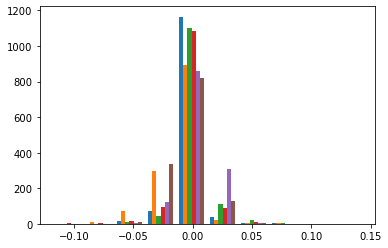

In [4]:
# Camera types:
# - BW1098OBC
# - OAK-D
# - OAK-D-IoT-40
# - BW1092
# - OAK-1-POE
# - BW1093OAK
# - OAK-1
# - OAK-D-LITE
# - OAK-D-POE
# - OAK-D-PRO
# - OAK-D-S2
# to plot histograms you will have to specify which device's data you wish to see and which data you wish to plot
# Plotting options are:
# camera0-SpecTranslation
# camera0-Translation
# camera0-WidthHeight
# camera0-IntrinsicMatrix
# camera0-SpecHfovDeg
# camera12-Rotation
# camera12-SpecTranslation
# camera12-Translation
# camera12-WidthHeight
# camera12-IntrinsicMatrix
# camera12-SpecHfovDeg
# MORE plotts can be added...
filesDic["OAK-D"].plotHistogram("camera12-Rotation")